# Mise en situation :
Nous sommes dans le contexte ou l'on a une population de 50 000 hommes de taille comprise entre [54;175] centimètres qui habite la ville A et de taille comprise entre ]175;272] qui habite la ville B

# Objectif :
Créer un réseau de neurones qui est en capacité de comprendre ce phénomène en classant correctement les habitants en fonction
de leur taille. Notre modèle devra analyser les données pour faire le lien entre la taille et le lieu d'habitation 
chose dont il n'a pas connaissance à son initialisation 

In [12]:
# import des librairies, dans le cadre de ce projet on se basera sur tensorflow 
import tensorflow
import seaborn as sns
import random
import numpy as np
import pandas as pd

# PARTIE 1 : Mise en place du jeu de données 

<AxesSubplot:ylabel='Count'>

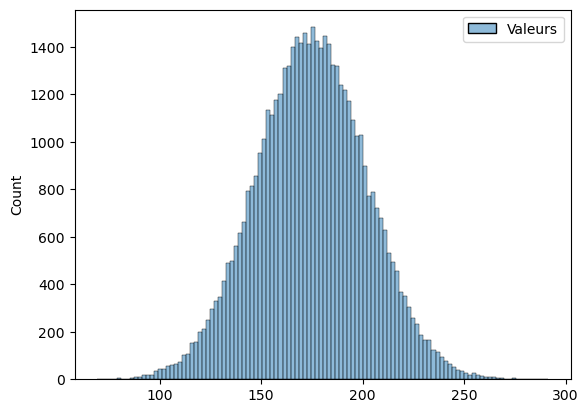

In [42]:
# La taille moyenne des hommes est de 175cm, à l'aide de la loi normale on va reproduire une population conforme à ce qui 
# pourrait exister dans le monde réel
mu, sigma = 175, (272-54)/8 # mu = moyenne / sigma = écart type -> pour simplifier on le calcul de manière empirique 
simu_norm = np.random.normal(mu,sigma,50000) 
loiNormalRes = pd.DataFrame(simu_norm,columns=['Valeurs'])
sns.histplot(loiNormalRes)

Dans le graphique '' on se rends compte que la distribution possède + de valeur de grand que de petit ... 
En effet on a un écart plus important entre 175-54=121 cm d'écart entre le + petit et la norme 
et 272-175cm d'écart entre le + grand et la norme ce qui explique 

In [44]:
np.min(loiNormalRes)

C:\Users\jujus\Anaconda3\envs\dvtai\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Valeurs    69.30362
dtype: float64

In [46]:
loiNormalRes.head()

,Valeurs
0,218.039455
1,172.840093
2,209.044143
3,197.159842
4,179.594040


In [ ]:
# TODO : Clean les données 
# 